In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import random,numpy as np
import seaborn as sb
sb.set()


In [ ]:
data = pd.read_csv("data.csv", index_col = 'id')
data = data.drop('Unnamed: 32', 1)

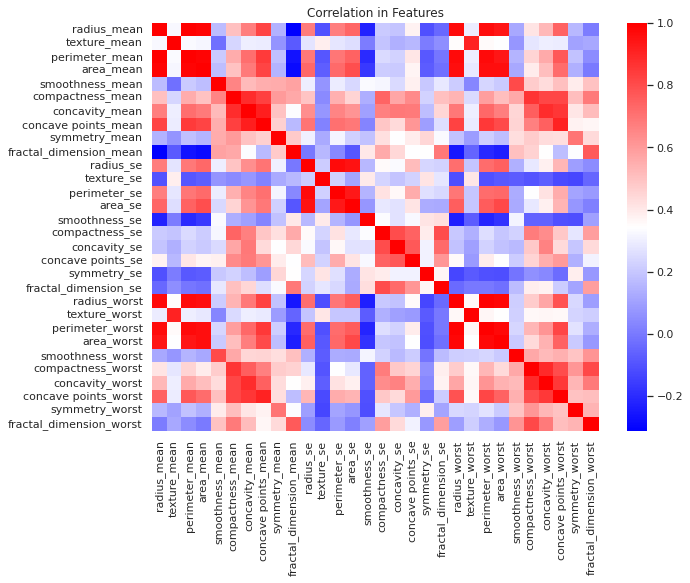

In [ ]:
plt.figure(figsize=(10, 7.5))
matrix = data.corr()
heat = sb.heatmap(matrix, cmap='bwr',annot=False) 
heat.set_title('Correlation in Features');

In [ ]:
#Mapping values to numeric data, Malignant represents 1 and Benign represents 0 
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})
y = data.diagnosis                         
list = ['diagnosis']
x = data.drop(list,axis = 1 )

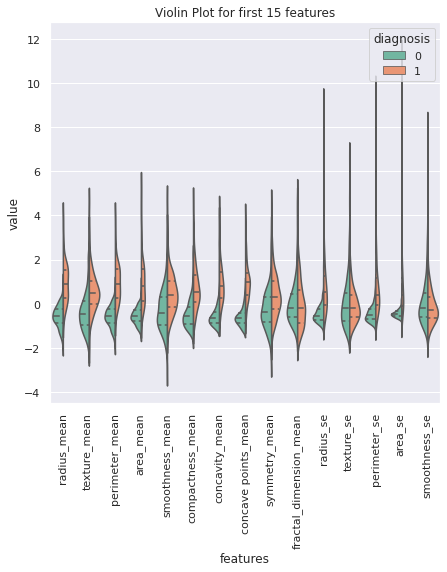

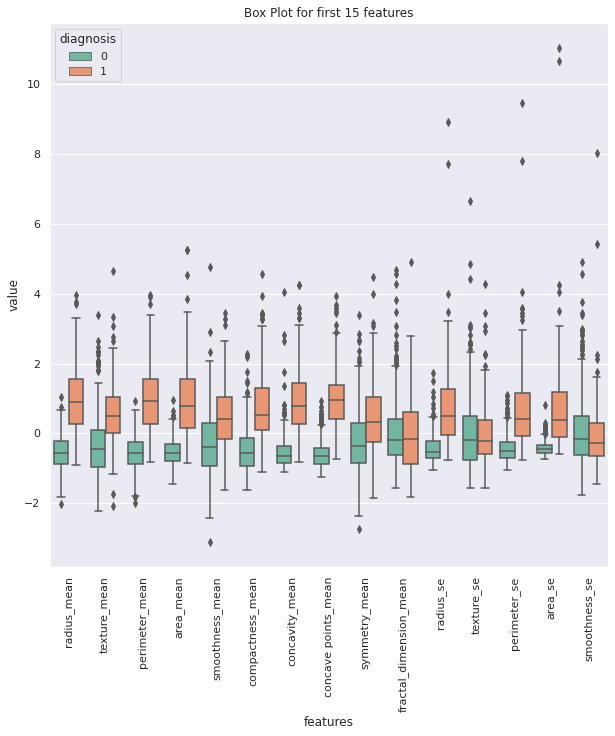

In [ ]:
data_new = x
data_standardised = (data_new - data_new.mean()) / (data_new.std())
data_new = pd.concat([y,data_standardised.iloc[:,0:15]],axis=1)
data_new = pd.melt(data_new,id_vars="diagnosis",var_name="features",value_name='value')
#Violin plot to check for correlation with target
plt.figure(figsize=(7,7))
violin1 = sb.violinplot(x="features", y="value", hue="diagnosis", data=data_new,split=True, inner="quart",palette="Set2")
violin1.set_title("Violin Plot for first 15 features")
plt.xticks(rotation=90)
plt.show()
#box plot to check for outliers
plt.figure(figsize=(10,10))
box1 = sb.boxplot(x="features", y="value", hue="diagnosis", data=data_new,palette="Set2")
box1.set_title("Box Plot for first 15 features")
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

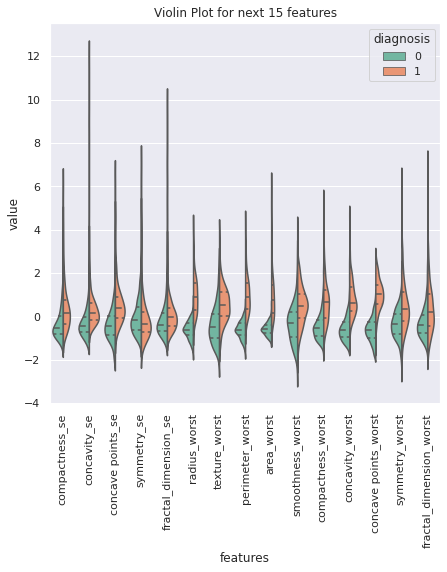

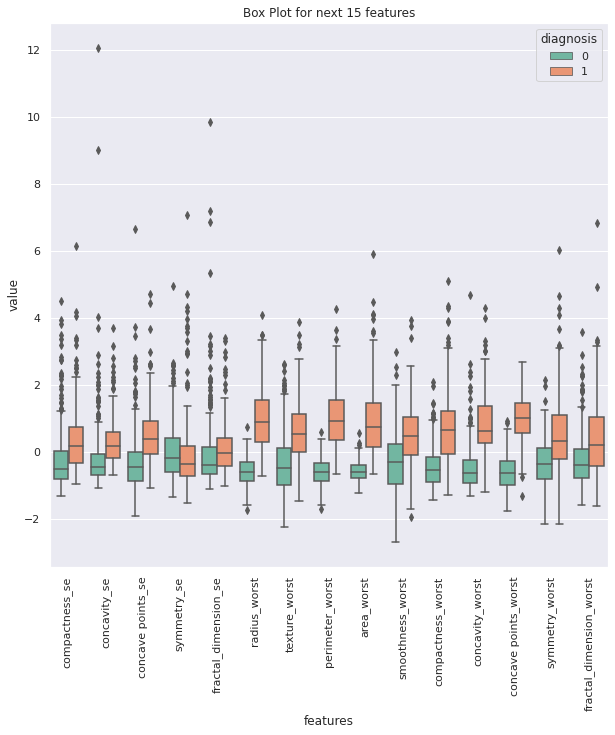

In [ ]:
data_new = x
data_standardised = (data_new - data_new.mean()) / (data_new.std())              # standardization
data_new = pd.concat([y,data_standardised.iloc[:,15:30]],axis=1)
data_new = pd.melt(data_new,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(7,7))
violin2 = sb.violinplot(x="features", y="value", hue="diagnosis", data=data_new,split=True, inner="quart",palette="Set2")
violin2.set_title("Violin Plot for next 15 features")
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
box2 = sb.boxplot(x="features", y="value", hue="diagnosis", data=data_new,palette="Set2")
box2.set_title("Box Plot for next 15 features")
plt.xticks(rotation=90)

In [ ]:
#naive approach to drop without PCA

In [ ]:
corr_matrix = data.corr().abs()
threshold = 0.85
high_corr_var=np.where(corr_matrix>threshold)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('compactness_mean', 'concavity_mean'), ('compactness_mean', 'compactness_worst'), ('concavity_mean', 'concave points_mean'), ('concavity_mean', 'concavity_worst'), ('concavity_mean', 'concave points_worst'), ('concave points_mean', 'perimeter_worst'), ('concave points_mean', 'concave points_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('perimeter_se', 'area_se'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'area_worst'), ('perimeter_worst', 'area_worst'), ('compactness_worst', 'conca

In [ ]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
# print(to_drop)

In [ ]:
"""
- radius_mean, perimeter_mean and area_mean have high correlation. So we only pick area_mean as area_mean is also correlated
to area_worst.
-  radius_se, perimeter_se and area_se and again correlated so we pick area_se
- radius_worst, perimeter_worst and area_worst and again correlated so we pick area_worst
- area_mean and area_worst are correlated, so we choose area mean
-  concavity_mean , compactness_mean and concave points_mean are correlated, so we pick concavity_mean
- similarly for the above we pick, concavity worst, and concavity_se.
- out of texture_mean and texture_worst, we choose texture_mean

"""

'\n- radius_mean, perimeter_mean and area_mean have high correlation. So we only pick area_mean as area_mean is also correlated\nto area_worst.\n-  radius_se, perimeter_se and area_se and again correlated so we pick area_se\n- radius_worst, perimeter_worst and area_worst and again correlated so we pick area_worst\n- area_mean and area_worst are correlated, so we choose area mean\n-  concavity_mean , compactness_mean and concave points_mean are correlated, so we pick concavity_mean\n- similarly for the above we pick, concavity worst, and concavity_se.\n- out of texture_mean and texture_worst, we choose texture_mean\n\n'

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_removed = x.drop(drop_list1,axis = 1 )      
X_removed.shape

(569, 16)

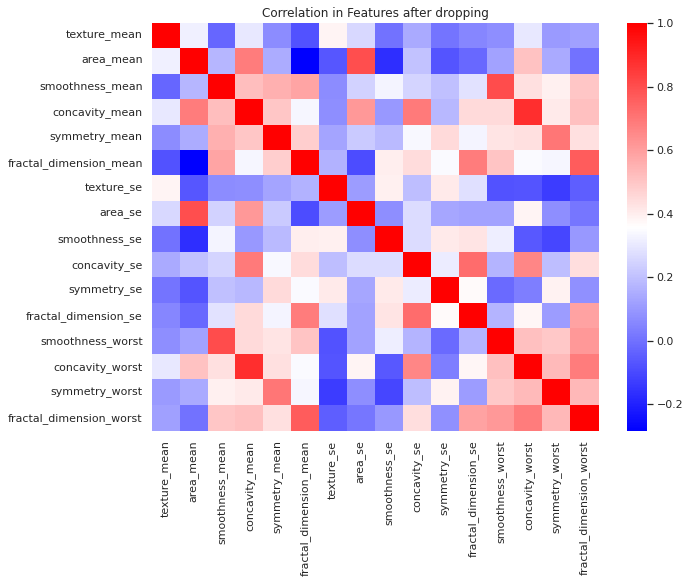

In [ ]:
plt.figure(figsize=(10, 7.5))
matrix = X_removed.corr()
heat = sb.heatmap(matrix, cmap='bwr',annot=False) 
heat.set_title('Correlation in Features after dropping');

Train accuracy: 0.98
Test accuracy: 0.96
Test Recall: 0.96

Test confusion_matrix


Text(30.5, 0.5, 'True')

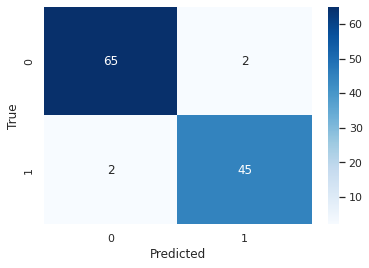

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_naive, X_test_naive, y_train, y_test = train_test_split(X_removed, y, test_size=0.20, 
                                                            shuffle=True, random_state=0)

# fit scaler on training data
norm = StandardScaler().fit(X_train_naive)
# transform training data
X_train_naive_norm = norm.transform(X_train_naive)
# transform testing dataabs
X_test_naive_norm = norm.transform(X_test_naive)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_naive_norm, y_train)

# Make predictions
y_pred = clf.predict(X_test_naive_norm) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_naive_norm)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("Test Recall:", np.round(cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[1][0]),2))
print("\nTest confusion_matrix")
sb.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
#PCA 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

X_scaled = StandardScaler().fit_transform(data_standardised)

In [ ]:
pca_initial = decomposition.PCA()
pcafit = pca_initial.fit_transform(X_scaled,y)
var_explained = pca_initial.explained_variance_ratio_ 
print(sum(var_explained[0:2]))
print(sum(var_explained[0:6]))
print(sum(var_explained[0:7]))
print(sum(var_explained[0:10]))
print(sum(var_explained[0:15]))
print(sum(var_explained[0:20]))
print(sum(var_explained[0:30]))
##indeed,the first 10 PCs explain 95% of the variance

0.6324320765155941
0.8875879635669056
0.9100953006967307
0.9515688143366666
0.9864881227145468
0.9955720432628137
1.0


Projecting 30-dimensional data to 2D


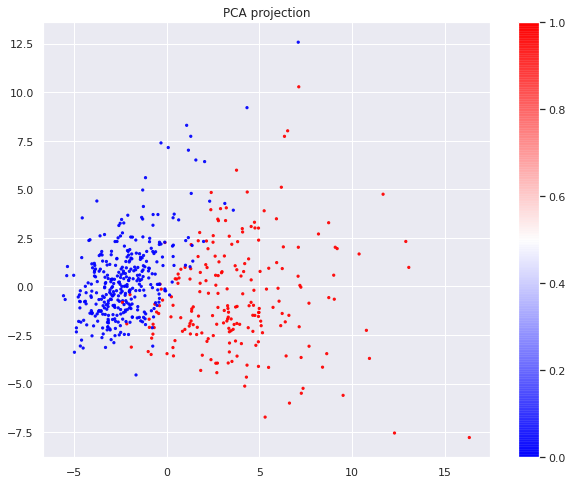

In [ ]:
# fit scaler on training data
normal = StandardScaler().fit(x)
# transform training data
hello = normal.transform(x)
# transform testing dataabs
pca = decomposition.PCA(n_components=10)
X_pca_scaled = pca.fit_transform(hello)
print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])
plt.figure(figsize=(10,8))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=data['diagnosis'], alpha=0.9, s=20, cmap='bwr',marker='.');
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

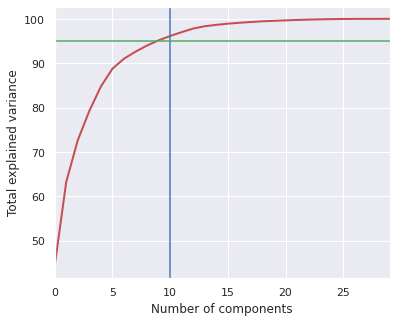

In [ ]:
pca = decomposition.PCA().fit(X_scaled)
plt.figure(figsize=(6,5))
plt.plot(100*np.cumsum(pca.explained_variance_ratio_), color='r', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.axvline(10, c='b')
plt.axhline(95.0, c='g')
plt.show();


Size: 
(455, 10)


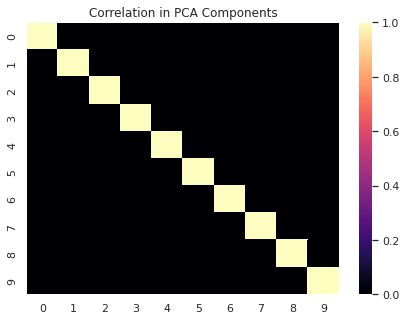

In [ ]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler


X_train_pca, X_test_pca, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                            shuffle=True, random_state=0)
# fit scaler on training data
norm = StandardScaler().fit(X_train_pca)
# transform training data
X_train_pca_norm = norm.transform(X_train_pca)
# transform testing dataabs
X_test_pca_norm = norm.transform(X_test_pca)

# sc = StandardScaler()
# X_scaled = sc.fit_transform(x)

# Apply PCA
from sklearn.decomposition import PCA
dimension = 10
pca = PCA(n_components=dimension)
# X_pca = pca.fit_transform(X_scaled)
fitter = pca.fit(X_train_pca_norm)
X_pca = fitter.transform(X_train_pca_norm)
X_test_pca_norm = fitter.transform(X_test_pca_norm)
# Get the transformed dataset
X_pca1 = pd.DataFrame(X_pca)
# print(X_pca.head())
print("\nSize: ")
print(X_pca1.shape)

fig = plt.figure(figsize=(7, 5))
heat = sb.heatmap(X_pca1.corr(),cmap='magma')
heat.set_title('Correlation in PCA Components');

Train accuracy: 0.99
Test accuracy: 0.95
Test Recall: 0.94

Test confusion_matrix


Text(30.5, 0.5, 'True')

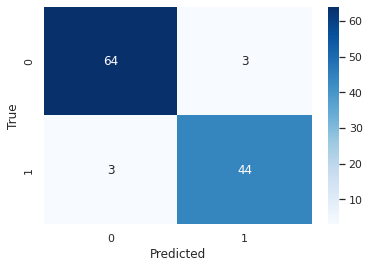

In [ ]:
# Make train and test sets
from sklearn.model_selection import train_test_split


# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
#                                                             shuffle=True, random_state=0)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca_norm) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("Test Recall:", np.round(cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[1][0]),2))
print("\nTest confusion_matrix")
sb.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
data_pure = pd.read_csv("data.csv")
data_pure = data_pure.drop('Unnamed: 32', 1)
data_pure = data_pure.drop('id', 1)

X = data_pure.drop('diagnosis',1)
data_pure['diagnosis']  = data_pure['diagnosis'].map({'M': 1, 'B':0})
y = pd.Series(data_pure.diagnosis)

Train accuracy: 0.99
Test accuracy: 0.96
Test Recall: 0.96

Test confusion_matrix


Text(30.5, 0.5, 'True')

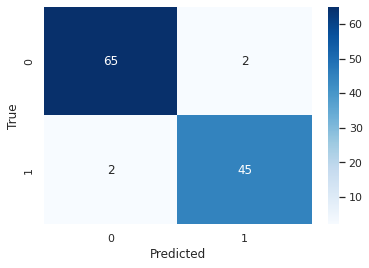

In [ ]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=0)

norm = StandardScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_norm, y_train)

# Make predictions
y_pred = clf.predict(X_test_norm) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_norm)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)

print("Test Recall:", np.round(cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[1][0]),2))
print("\nTest confusion_matrix")
sb.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)